In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.special import kv, iv
from scipy.optimize import curve_fit

C:\Users\ricca\AppData\Local\Temp\ipykernel_18312\1114158456.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
file = r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\IR_KIDS_CHAR\1o raff\DA2-Results\Results_19_02\19_02_res1.txt'
df = pd.read_csv(file,sep='\t',usecols=['Q','sQ','Qc','sQc','Qi','sQi','T'])

In [16]:
KB = constants.Boltzmann/constants.eV
hbar = constants.Planck/(np.pi*2)/constants.eV

In [17]:
idx = [i for i,T in enumerate(df['T']) if T not in [150,300]]
x = np.array(df['T'])[idx][1::2]*KB
y = np.array(df['Qi'])[idx][1::2]
yerr = np.array(df['sQi'])[idx][1::2]

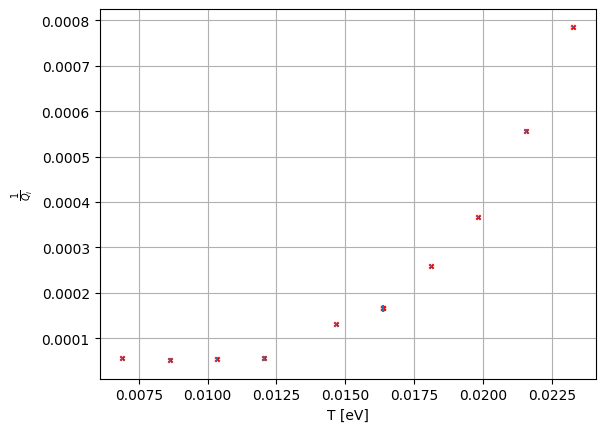

In [18]:
plt.errorbar(x,y,yerr,linestyle='')
plt.scatter(x,y,marker='x',s=10,color='red')
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [eV]')
plt.grid()

In [19]:
omega = 5.3465*1e9
alpha = 0.8669

In [44]:
def model(val_t, delta0, q0,b, T_k):
    xi = hbar * omega / (2 * val_t)
    sigma1 = 4*np.exp(-delta0/(val_t))*np.sinh(xi)*kv(0, xi)
    sigma2 = np.pi*(1-2*np.exp(-delta0/(val_t))*np.exp(-xi)*iv(0, xi))
    
    return (alpha/2)*sigma1/sigma2 - q0 - b*np.log(val_t/T_k)

In [49]:
d0 = 0.25*1e-1
q0 = -y[0]
T_k = 0.008
b = 0
p = [d0, q0, b, T_k]

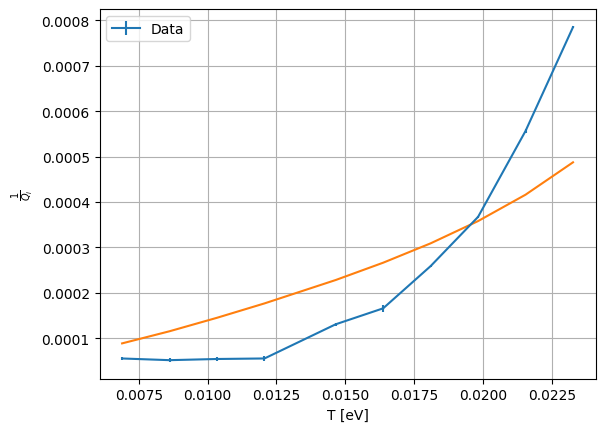

In [50]:
#for k in np.arange(1.5,3,0.1):
plt.errorbar(x,y,yerr,linestyle='-',label='Data')
plt.plot(x,model(x,*p))
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [eV]')
plt.grid()
plt.legend()

In [51]:
from iminuit.cost import LeastSquares
from iminuit import minuit

lsq = LeastSquares(x,y,yerr,model)
m = minuit.Minuit(lsq, *p)
#m.limits['q0'] = (0)
#m.limits['T_k'] = (min(x),max(x))
m.migrad(ncall=10000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.2 (χ²/ndof = 14.6)     │              Nfcn = 242              │
│ EDM = 6.56e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ delta0 │ 20.121e-3 │ 0.018e-3  │            │            │         │         │       │
│ 1 │ q0     │  0.58e-3  │  0.21e-3  │            │            │         │         │       │
│ 2 │ b      │  211e-6   │   4e-6    │            │            │         │         │       │
│ 3 │ T_k    │    0.1    │    0.1    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────┐
│        │     delta0         q0          b        T_k │
├────────┼─────────────────────────────────────────────┤
│ delta0 │    3.1e-10   -0.03e-9  -0.058e-9   52.04e-9 │
│     q0 │   -0.03e-9   4.35e-08   0.004e-9   20.33e-6 │
│      b │  -0.058e-9   0.004e-9      2e-11 -17.850e-9 │
│    T_k │   52.04e-9   20.33e-6 -17.850e-9    0.00952 │
└────────┴─────────────────────────────────────────────┘

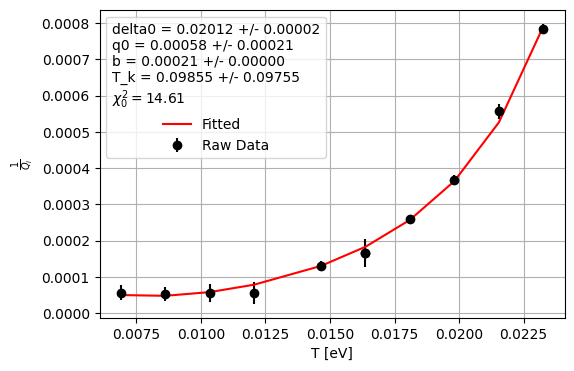

In [52]:
fig = plt.figure(figsize=(6,4))
fig.tight_layout
plt.errorbar(x,y,yerr*5,label='Raw Data',linestyle='',fmt='ko')
#plt.plot(x,model(x,*p),label='Expected',color='orange',linestyle='-.')
plt.plot(x,model(x,*m.values),label='Fitted',color='red',linestyle='-')
plt.ylabel(r'$\frac{1}{Q_{i}}$')
plt.xlabel('T [eV]')
plt.grid()

title = []
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.5f} +/- {m.errors[par]:.5f}"
    )
title.append(r'$\chi^{2}_{0} = $'+f"{m.fval/m.ndof:.2f}")

# Create the legend
legend = plt.legend(title="\n".join(title),fontsize=10)

In [485]:
print('Delta : '+f"{(popt[0]):.5f}"+' +/- '+f"{(np.sqrt(np.diag(pcov)[0])):.5f}"+' meV')
with open('Delta_2.txt','a') as f:
    f.writelines('\n'+'Delta : '+f"{(popt[0]):.5f}"+' +/- '+f"{(np.sqrt(np.diag(pcov)[0])):.5f}"+' meV')

Delta : 0.02012 +/- 0.00007 meV
